<a href="https://colab.research.google.com/github/Dev91205/1M1B-Green-Internship-Batch-3-PROJECT/blob/main/Job_Salary_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load your CSV dataset
df = pd.read_csv("/content/Salary_Data.csv")

# Show the first few rows
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Shape: (6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


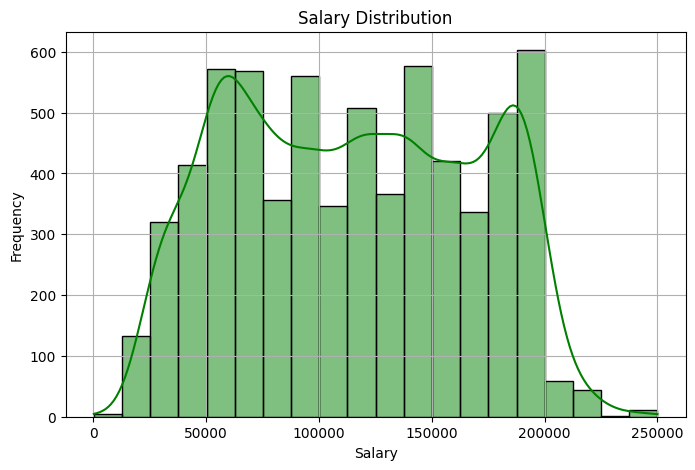

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [3]:
# Check structure
print("Shape:", df.shape)
print(df.info())

# Salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, bins=20, color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check for null values
df.isnull().sum()


In [4]:
# Define features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Categorical columns
categorical_features = ['Gender', 'Education Level', 'Job Title']
numeric_features = ['Age', 'Years of Experience']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Define models
from sklearn.impute import SimpleImputer

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_features), # Impute numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features) # Handle unknown categories and drop first
], remainder='passthrough')

# Impute missing values in y_train and y_test
imputer_y = SimpleImputer(strategy='median')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()


models = {
    'Linear Regression': Pipeline([
        ('preprocess', preprocessor),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train_imputed)
    predictions = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test_imputed, predictions),
        'RMSE': mean_squared_error(y_test_imputed, predictions)**0.5, # Calculate RMSE manually
        'R2 Score': r2_score(y_test_imputed, predictions)
    }

# Show results
results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,MAE,RMSE,R2 Score
Linear Regression,12496.420083,17929.052475,0.879637
Random Forest,2785.242008,7122.379742,0.981006


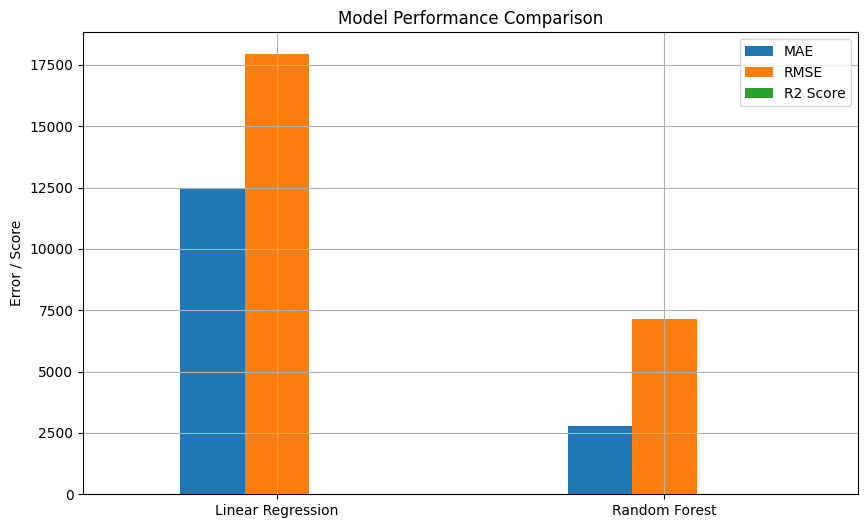

In [11]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Error / Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [12]:
# Example: predict salary for a new candidate
new_candidate = pd.DataFrame({
    'Age': [30],
    'Gender': ['Female'],
    'Education Level': ["Master's"],
    'Job Title': ['Data Analyst'],
    'Years of Experience': [4]
})

model_rf = models['Random Forest']
predicted_salary = model_rf.predict(new_candidate)[0]
print(f"Predicted Salary: ${int(predicted_salary):,}")


Predicted Salary: $106,687
